In [2]:
import numpy as np 
import pandas as pd
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the excel file and storing it in dataframe df
df = pd.read_csv("C:\Users\JOHN TOJO\Desktop\spam.csv", encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning

In [4]:
# checking the info regarding the dataframe (type and number of non-null elements present)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# check for nulls
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

**Unnamed: 2, Unnamed: 3, Unnamed: 4** have more than 60% of data as null hence **dropping** it 

In [6]:
# dropping the 3 columns (Unnamed: 2, Unnamed: 3, Unnamed: 4)
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# renaming the cols v1 to target and v2 to text
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# check for duplicate values
df.duplicated().sum()

403

* duplicates are present, need to remove them.
* duplicate data accounts 7% of the whole data set 
* hence duplicates can be removed as data loss is 7%

In [9]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [10]:
# check 
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

# EDA

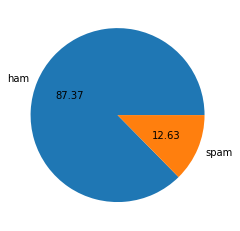

In [12]:
# using pie chart to plot the amount of data that are ham and spam
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

* 87.37 % data is ham
* 12.63% data is spam
* the data is imbalanced 

In [13]:
import nltk

# no of num_char present in text 
df['num_characters'] = df['text'].apply(len)

# no of words present in the text
df['num_words'] = df['text'].str.split().apply(len)

# no of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()


,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [14]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [15]:
df.groupby('target').describe().T

target                        ham        spam
num_characters count  4516.000000  653.000000
               mean     70.459256  137.891271
               std      56.358207   30.137753
               min       2.000000   13.000000
               25%      34.000000  132.000000
               50%      52.000000  149.000000
               75%      90.000000  157.000000
               max     910.000000  224.000000
num_words      count  4516.000000  653.000000
               mean     14.134632   23.681470
               std      11.116240    5.967672
               min       1.000000    2.000000
               25%       7.000000   22.000000
               50%      11.000000   25.000000
               75%      18.000000   28.000000
               max     171.000000   35.000000
num_sentences  count  4516.000000  653.000000
               mean      1.799601    2.967841
               std       1.278465    1.483201
               min       1.000000    1.000000
               25%       1.000000    2.000000
               50%       1.000000    3.000000
               75%       2.000000    4.000000
               max      28.000000    8.000000

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

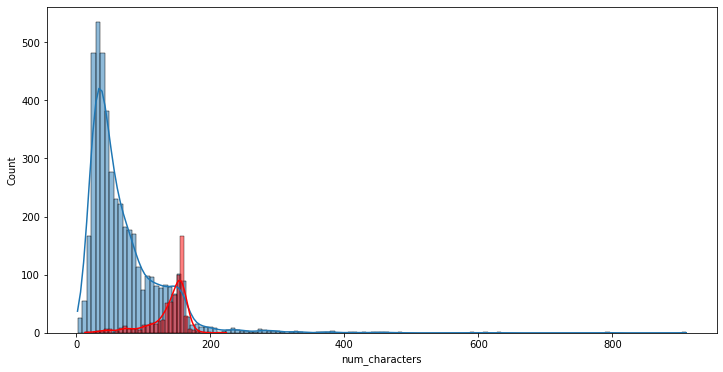

In [16]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 'ham']['num_characters'],label='ham', kde=True )
sns.histplot(df[df['target'] == 'spam']['num_characters'],color='red', kde=True)


* it can be seen that spam has more characters present than ham

<AxesSubplot:xlabel='num_words', ylabel='Count'>

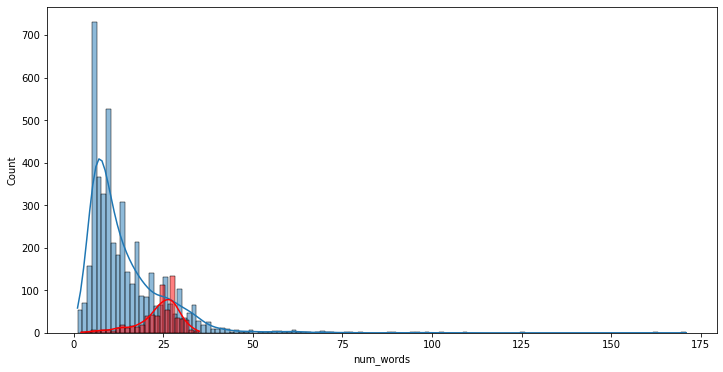

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 'ham']['num_words'], kde=True)
sns.histplot(df[df['target'] == 'spam']['num_words'],color='red', kde=True)

* the no of words present is more in spam, the size of spam is less compared to ham this is because of the imbalance present in the dataset


In [18]:
import string
from nltk.stem.porter import PorterStemmer
# using porter stemmer to use stemming
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric words
    text = [word for word in text if word.isalnum()]
    
    # Load stopwords and punctuation
    stopwords = set(nltk.corpus.stopwords.words('english'))
    punctuation = set(string.punctuation)
    
    # Remove stopwords and punctuation
    text = [word for word in text if word not in stopwords and word not in punctuation]
    
    # Stem words
    text = [ps.stem(word) for word in text]
    
    # Join words into a single string
    text = " ".join(text)
    
    return text


In [19]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [20]:
from wordcloud import WordCloud

def Display_wordcloud(data,title):
    feedbackcloud = WordCloud(
        background_color = 'black',
        max_words = 1000,
        max_font_size = 40, 
        scale = 3,
        random_state = 25
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 10),facecolor='g')
    plt.axis('off')
    plt.imshow(feedbackcloud)
    plt.title(f"{title} words")
    plt.show()

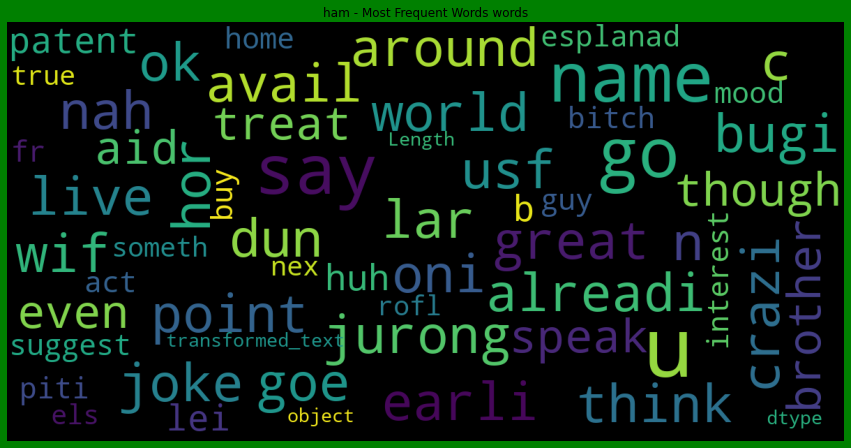

In [21]:
# ham - Frequent words in training data
Display_wordcloud(df['transformed_text'][df['target']=='ham'],"ham - Most Frequent Words")

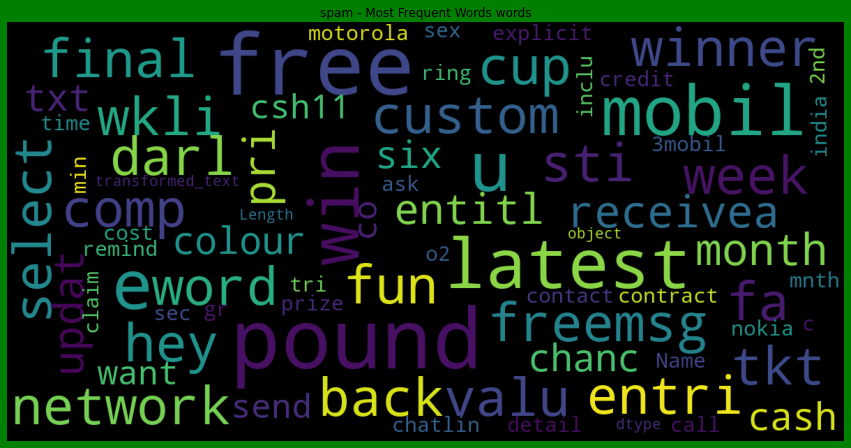

In [22]:
# spam - Frequent words in training data
Display_wordcloud(df['transformed_text'][df['target']=='spam'],"spam - Most Frequent Words")

In [23]:
spam_corpus = []
for msg in df[df['target'] == 'spam']['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)        

9939

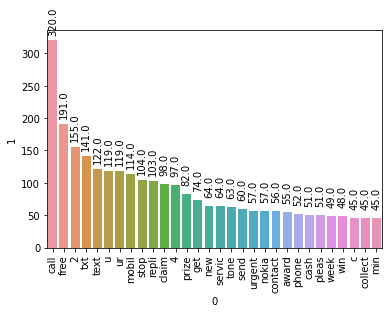

In [24]:
from collections import Counter
# Create the bar plot
ax = sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
                 pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add text labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', rotation =90)

# Show the plot
plt.show()


the most common words present in spam are 
* call
* free
* txt

In [25]:
ham_corpus = []
for msg in df[df['target'] == 'ham']['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)        

35394

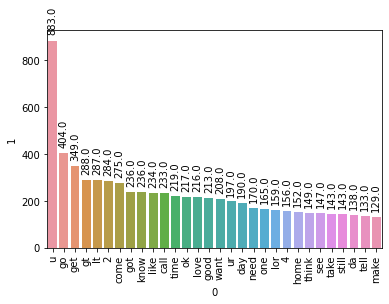

In [26]:
# Create the bar plot
ax = sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
                 pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add text labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', rotation =90)

# Show the plot
plt.show()


most common words present in ham are 
* u
* go

In [27]:
# converting spam and ham to numbers using label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


# Model Building

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)

In [29]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 5000)

In [30]:
y = df['target'].values

### balancing the dataset using smote

In [31]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from imblearn.over_sampling import SMOTE
# by using smote we are adding data to (Yes) 1 such that the ratio between 1 to 0 becomes 0.75
ove_sm=SMOTE(0.9)
X,y=ove_sm.fit_resample(X,y)

In [32]:
y

array([0, 0, 1, ..., 1, 1, 1])

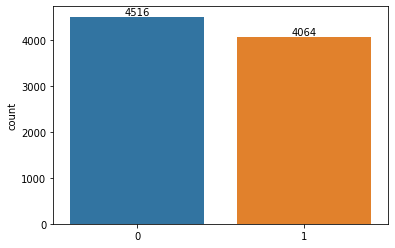

In [33]:
ax=sns.countplot(y)
ax.bar_label(ax.containers[0]);
plt.show()

the dataset is balanced

In [34]:
# splitting to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [36]:
# intialising
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [37]:
# storing into a dictionary
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb,
    'RF': rfc, 
    'ETC': etc,
}

In [38]:
from sklearn.metrics import roc_auc_score, auc,roc_curve,f1_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score,confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test, roc_auc_scores, f1_scores, mse_scores, mae_scores, accuracy_scores, precision_scores):
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the metrics
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Append the metrics to the provided lists
    roc_auc_scores.append(roc_auc)
    f1_scores.append(f1)
    mse_scores.append(mse)
    mae_scores.append(mae)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    
    # Print the values
    print("ROC AUC: ", roc_auc)
    print("F1 score: ", f1)
    print("Mean squared error: ", mse)
    print("Mean absolute error: ", mae)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    
    cm = confusion_matrix(y_test, y_pred)
    class_label = ["spam", "ham"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print('\n')
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=name + ' (AUC = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],'r--')
    
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    
    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()


Classifier:  SVC
ROC AUC:  0.9890622891285411
F1 score:  0.9882643607164917
Mean squared error:  0.011072261072261072
Mean absolute error:  0.011072261072261072
Accuracy:  0.9889277389277389
Precision:  0.9852216748768473


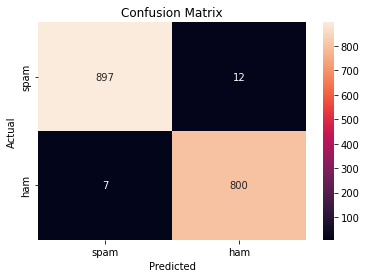

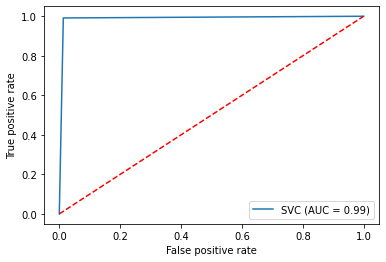


Classifier:  KN
ROC AUC:  0.9878865209941068
F1 score:  0.9875156054931336
Mean squared error:  0.011655011655011656
Mean absolute error:  0.011655011655011656
Accuracy:  0.9883449883449883
Precision:  0.9949685534591195


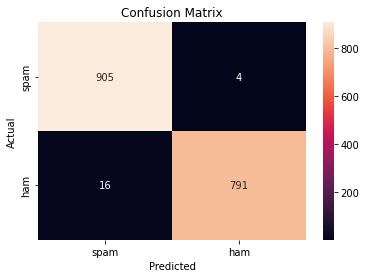

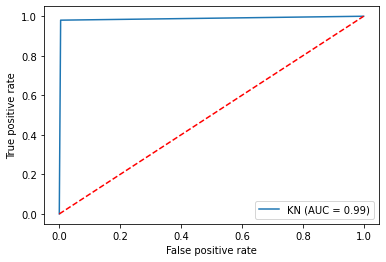


Classifier:  NB
ROC AUC:  0.9828031130250572
F1 score:  0.9815270935960592
Mean squared error:  0.017482517482517484
Mean absolute error:  0.017482517482517484
Accuracy:  0.9825174825174825
Precision:  0.9755201958384333


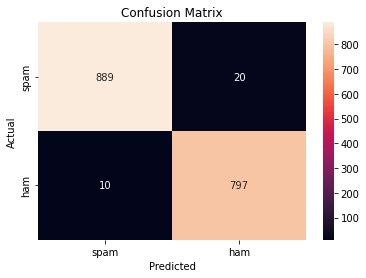

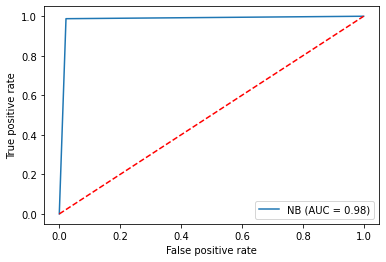


Classifier:  RF
ROC AUC:  0.9938042131350682
F1 score:  0.9937655860349127
Mean squared error:  0.005827505827505828
Mean absolute error:  0.005827505827505828
Accuracy:  0.9941724941724942
Precision:  1.0


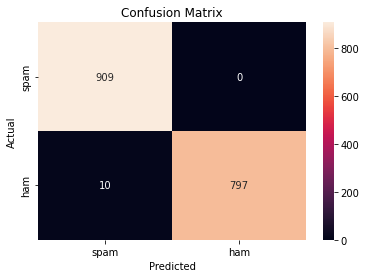

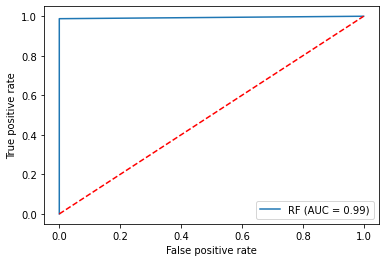


Classifier:  ETC
ROC AUC:  0.9969021065675341
F1 score:  0.9968924798011187
Mean squared error:  0.002913752913752914
Mean absolute error:  0.002913752913752914
Accuracy:  0.997086247086247
Precision:  1.0


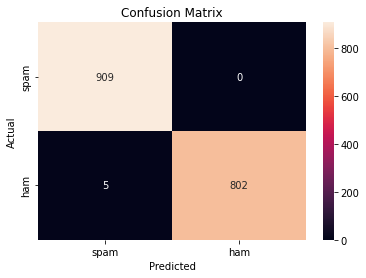

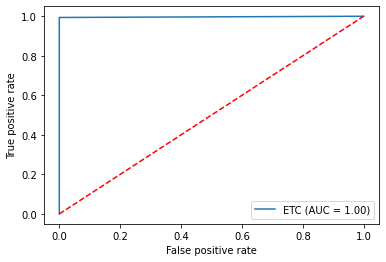

In [39]:
roc_auc_scores = []
f1_scores = []
mse_scores = []
mae_scores = []
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    print("Classifier: ", name)
    train_classifier(clf, X_train, y_train, X_test, y_test, roc_auc_scores, f1_scores, mse_scores, mae_scores, accuracy_scores, precision_scores)
    print()


In [40]:
# Create a DataFrame to store the metrics
df_model = pd.DataFrame({
    'classifier': list(clfs.keys()),
    'roc_auc': roc_auc_scores,
    'f1': f1_scores,
    'mse': mse_scores,
    'mae': mae_scores,
    'accuracy': accuracy_scores,
    'precision': precision_scores
})


df_model = df_model.sort_values(['roc_auc', 'mse'], ascending=[False, True])


df_model


,classifier,roc_auc,f1,mse,mae,accuracy,precision
4,ETC,0.996902,0.996892,0.002914,0.002914,0.997086,1.000000
3,RF,0.993804,0.993766,0.005828,0.005828,0.994172,1.000000
0,SVC,0.989062,0.988264,0.011072,0.011072,0.988928,0.985222
1,KN,0.987887,0.987516,0.011655,0.011655,0.988345,0.994969
2,NB,0.982803,0.981527,0.017483,0.017483,0.982517,0.975520


### ETC is the best model
* highest roc_auc area
* highest accuracy and precision
* least error in mae and mse
* least value for FP and FN compared other models 

### Storing the model and loading for later use 

In [41]:
import pickle
filename='spam and ham.pkl'
pickle.dump(etc,open(filename,'wb'))

In [42]:
model=pickle.load(open('spam and ham.pkl','rb'))

In [43]:
predictions=model.predict(X_test)

In [44]:
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
ham_spam_dict = {1:'spam', 0:'ham'}
predictions_df = pd.DataFrame({ 'Predicted': predictions, 'Actual': y_test}, columns=[ 'Predicted', 'Actual'])
predictions_df['Predicted'] = predictions_df['Predicted'].map(ham_spam_dict)
predictions_df['Actual'] = predictions_df['Actual'].map(ham_spam_dict)
predictions_df

,Predicted,Actual
0,ham,ham
1,ham,ham
2,ham,ham
3,ham,ham
4,spam,spam
...,...,...
1711,ham,ham
1712,spam,spam
1713,spam,spam
1714,ham,ham
